In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [50]:
train=pd.read_csv('D:/R/Hr analytics new/train.csv')
test=pd.read_csv('D:/R/Hr analytics new/test.csv')

In [51]:
#Combine test and train into one file
master = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, master.shape)
master.head()

(18359, 14) (15021, 13) (33380, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0.0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0.0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0.0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0.0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1.0


In [52]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33380 entries, 0 to 33379
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  25894 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     32759 non-null  object 
 6   education_level         32528 non-null  object 
 7   major_discipline        28149 non-null  object 
 8   experience              33277 non-null  object 
 9   company_size            24550 non-null  object 
 10  company_type            24011 non-null  object 
 11  last_new_job            32709 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  18359 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [53]:
#CHECK NA
master.isnull().sum()/len(master)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.426603
relevent_experience        0.000000
enrolled_university        1.860395
education_level            2.552427
major_discipline          15.671061
experience                 0.308568
company_size              26.452966
company_type              28.067705
last_new_job               2.010186
training_hours             0.000000
target                    45.000000
dtype: float64

In [54]:
# CHECK UNIQUE VALUES

master.apply(lambda x : len(x.unique()))

enrollee_id               33380
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        3
dtype: int64

In [55]:
##### DEALING WITH NULL VALUES######

#1.CITY
master['city'].value_counts()
master.drop(['city'], axis=1)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0.0
1,29166,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0.0
2,46,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0.0
3,18527,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0.0
4,21751,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33375,11308,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68,NaN
33376,14612,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320,NaN
33377,33346,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13,NaN
33378,14506,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38,NaN


2    30948
1     2085
0      347
Name: gender, dtype: int64

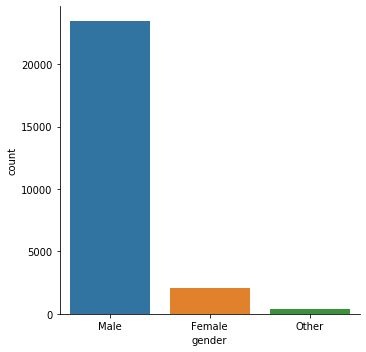

In [56]:
#2.GENDER

sns.catplot(x="gender", kind="count", data=master);
master['gender']=master['gender'].fillna('Male')
gf={'Other':0,'Female':1,'Male':2}
master.gender=master.gender.map(gf)
master.gender=master.gender.astype(int)
master['gender'].value_counts()

0    25508
1     5752
2     2120
Name: enrolled_university, dtype: int64

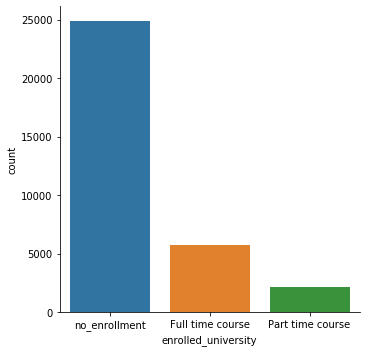

In [57]:
#3.ENROLLED UNIVERSITY


sns.catplot(x="enrolled_university", kind="count", data=master);
master['enrolled_university']=master['enrolled_university'].fillna('no_enrollment')
gs={'no_enrollment':0,'Full time course':1,'Part time course':2}
master.enrolled_university=master.enrolled_university.map(gs)
master.enrolled_university=master.enrolled_university.astype(int)
master['enrolled_university'].value_counts()

4    20364
3     7797
2     3708
1      881
0      630
Name: education_level, dtype: int64

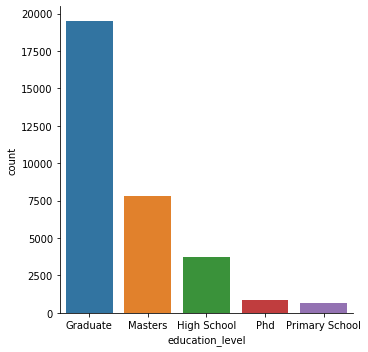

In [58]:
#4.EDUCATION LEVEL


sns.catplot(x="education_level", kind="count", data=master);
master['education_level']=master['education_level'].fillna('Graduate')
ge={'Primary School':0,'Phd':1,'High School':2,'Masters':3,'Graduate':4}
master.education_level=master.education_level.map(ge)
master.education_level=master.education_level.astype(int)
master['education_level'].value_counts()

5    30086
4     1212
3      678
2      585
1      432
0      387
Name: major_discipline, dtype: int64

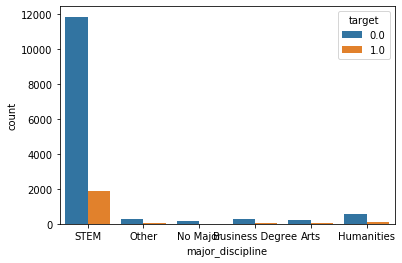

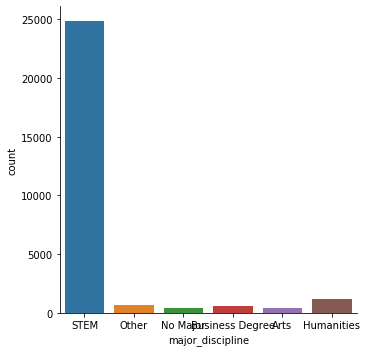

In [59]:
#5.Major Discipline

sns.countplot(x='major_discipline',data=master,hue="target")
sns.catplot(x="major_discipline", kind="count", data=master);
master['major_discipline']=master['major_discipline'].fillna('STEM')
gt={'No Major':0,'Arts':1,'Business Degree':2,'Other':3,'Humanities':4,'STEM':5}
master.major_discipline=master.major_discipline.map(gt)
master.major_discipline=master.major_discipline.astype(int)
master['major_discipline'].value_counts()

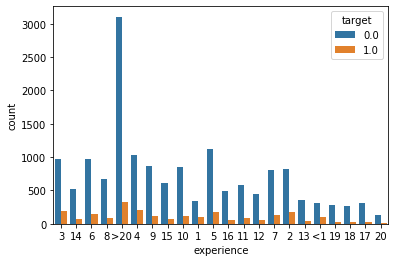

In [60]:
#6.EXPERIENCE
master['experience'].value_counts()
sns.countplot(x='experience',data=master,hue="target")
master['experience'].replace({'<1':'1','>20':'20'},inplace=True)
master['experience']=master['experience'].fillna('20')
master['experience']=master['experience'].astype('int')

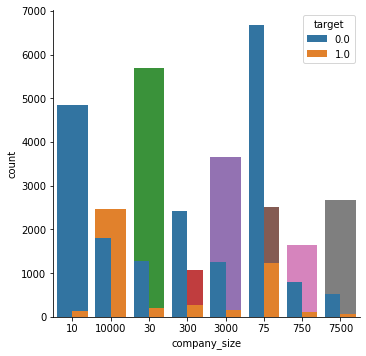

In [61]:
#7.COMPANY SIZE
master['company_size'].value_counts()
master['company_size'].replace({'<10':'10','10/49':'30','50-99':'75','100-500':'300','500-999':'750',
                            '1000-4999':'3000','5000-9999':'7500','10000+':'10000'},inplace=True)
sns.catplot(x="company_size", kind="count", data=master);
master['company_size']=master['company_size'].fillna('75')
sns.countplot(x='company_size',data=master,hue="target")
master['company_size']=master['company_size'].astype('int')

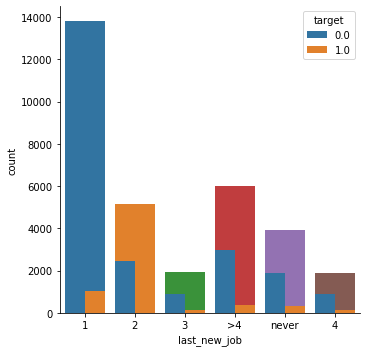

In [62]:
#8.LAST_NEWJOB
master['last_new_job'].value_counts()
sns.catplot(x="last_new_job", kind="count", data=master);
sns.countplot(x='last_new_job',data=master,hue="target")
master['last_new_job'].replace({'>4':4,'never':0},inplace=True)
master['last_new_job']=master['last_new_job'].fillna(1)
master['last_new_job']=master['last_new_job'].astype('int')

5    27483
4     1880
3     1792
2     1029
1      973
0      223
Name: company_type, dtype: int64

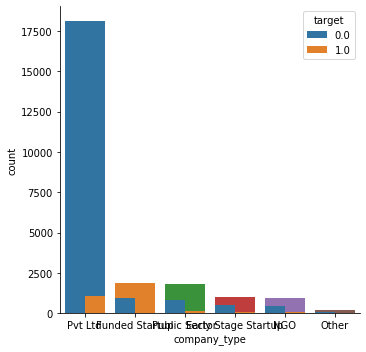

In [63]:
#9.COMPANY_TYPE

sns.catplot(x="company_type",kind="count",data=master)
sns.countplot(x="company_type",data=master,hue="target")
master['company_type']=master['company_type'].fillna('Pvt Ltd')
gy={'Other':0,'NGO':1,'Early Stage Startup':2,'Public Sector':3,'Funded Startup':4,'Pvt Ltd':5}
master.company_type=master.company_type.map(gy)
master.company_type=master.company_type.astype(int)
master['company_type'].value_counts()

In [64]:
#TARGET VARIABLE #IMBALANCE DATASET
master['target'].value_counts(normalize=True)*100

0.0    86.79122
1.0    13.20878
Name: target, dtype: float64

In [65]:
master.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,2,Has relevent experience,0,4,5,3,300,5,1,106,0.0
1,29166,city_83,0.923,2,Has relevent experience,0,4,5,14,10,4,1,69,0.0
2,46,city_16,0.910,2,Has relevent experience,0,4,5,6,75,3,2,4,0.0
3,18527,city_64,0.666,2,Has relevent experience,0,4,5,14,75,5,1,26,0.0
4,21751,city_100,0.887,2,No relevent experience,0,3,5,8,75,5,2,88,1.0


In [66]:
#REGION
master.city=master.city.str.extract('(\d+)')
master.city=master.city.astype(int)
master.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,149,0.689,2,Has relevent experience,0,4,5,3,300,5,1,106,0.0
1,29166,83,0.923,2,Has relevent experience,0,4,5,14,10,4,1,69,0.0
2,46,16,0.910,2,Has relevent experience,0,4,5,6,75,3,2,4,0.0
3,18527,64,0.666,2,Has relevent experience,0,4,5,14,75,5,1,26,0.0
4,21751,100,0.887,2,No relevent experience,0,3,5,8,75,5,2,88,1.0


1    24698
0     8682
Name: relevent_experience, dtype: int64

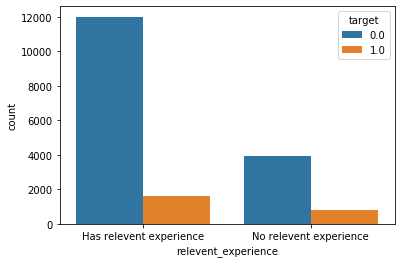

In [67]:
#RELEVTNT

sns.countplot(x="relevent_experience",data=master,hue="target")
gs={'Has relevent experience':1,'No relevent experience':0}
master.relevent_experience=master.relevent_experience.map(gs)
master.relevent_experience=master.relevent_experience.astype(int)
master.relevent_experience.value_counts()

In [68]:
##FEATURE ENGINERING##
master['Texp_Till']=master.experience + master.last_new_job
master.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Texp_Till
0,23798,149,0.689,2,1,0,4,5,3,300,5,1,106,0.0,4
1,29166,83,0.923,2,1,0,4,5,14,10,4,1,69,0.0,15
2,46,16,0.910,2,1,0,4,5,6,75,3,2,4,0.0,8
3,18527,64,0.666,2,1,0,4,5,14,75,5,1,26,0.0,15
4,21751,100,0.887,2,0,0,3,5,8,75,5,2,88,1.0,10


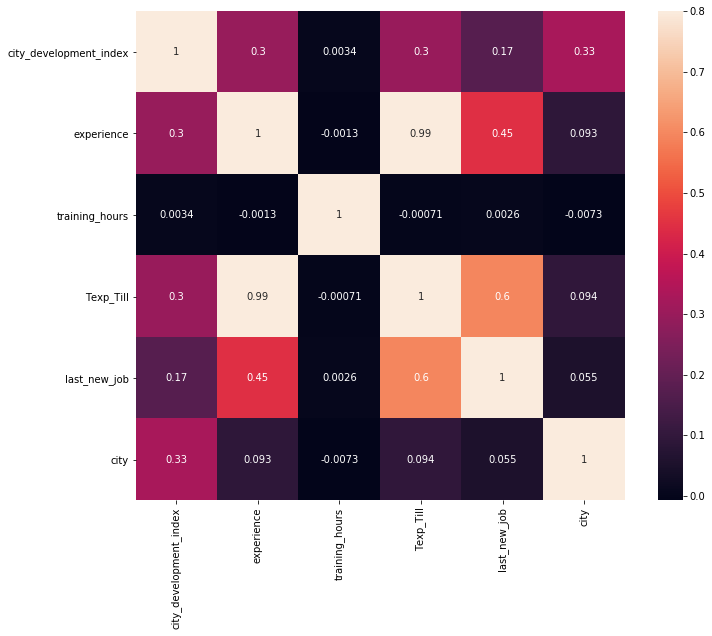

In [69]:

contvars=master[['city_development_index','experience','training_hours','Texp_Till','last_new_job','city']]
#####CORRELATION MATRIX######
#correlation matrix
corrmat = contvars.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

In [70]:

cat=['gender','relevent_experience','enrolled_university','company_size','major_discipline','education_level','company_type']

##########MODEL BUILDING###########

master= pd.get_dummies(master, columns=cat)
master.head()

X = master[master['target'].isnull()!=True].drop(['enrollee_id','target'], axis=1)
y = master[master['target'].isnull()!=True]['target']

X_test = master[master['target'].isnull()==True].drop(['enrollee_id','target'], axis=1)

X.shape, y.shape, X_test.shape



((18359, 39), (18359,), (15021, 39))

In [71]:
###########SMOTE############3
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [72]:
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=X_smote
y=y_smote
X_trains, X_vals, y_trains, y_vals = train_test_split(X,y, test_size = 0.2, random_state =1)


###SCALING##

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_trains)
X_vals = scaler.transform(X_vals)

In [73]:

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_trains,X_vals, y_trains, y_vals):
    for model in models:
            model.fit(X_trains, y_trains)
            y_test_pred = model.predict(X_vals)
            y_test_pred_new=model.predict_proba(X_vals)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_trains,y_trains)
            test_score=model.score(X_vals,y_vals)
            p_score=metrics.precision_score(y_vals,y_test_pred)
            r_score=metrics.recall_score(y_vals,y_test_pred)
            
            ac=metrics.roc_auc_score(y_vals,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_trains,X_vals, y_trains, y_vals)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Random Forest,0.947969,0.999176,0.911672,0.961827,0.855330
1,Bagging,0.942022,0.987840,0.903828,0.940952,0.859454
2,Logistic Regression,0.937861,0.904487,0.905083,0.999608,0.808376
3,bagged LR,0.937581,0.904487,0.905083,0.999608,0.808376
4,Ada boost,0.929647,0.892249,0.896611,0.981088,0.806472
5,KNN,0.926868,0.921040,0.898808,0.946562,0.842957
6,Naive-Bayes,0.881337,0.727151,0.730468,0.669664,0.897843
7,Decistion Tree,0.862445,0.999176,0.862253,0.845173,0.883249


In [80]:
### RANDOM FOREST###
random_forest = RandomForestClassifier(n_estimators=1000, oob_score=True)
random_forest.fit(X_trains, y_trains)
Y_prediction = random_forest.predict(X_vals)

random_forest.score(X_trains, y_trains)
acc_random_forest = round(random_forest.score(X_trains, y_trains) * 100, 2)
print(acc_random_forest)
print(classification_report(y_vals,Y_prediction))
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

99.92
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      3222
         1.0       0.96      0.86      0.91      3152

    accuracy                           0.91      6374
   macro avg       0.92      0.91      0.91      6374
weighted avg       0.92      0.91      0.91      6374

oob score: 91.35 %


In [90]:
##TUNNING###
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X_trains,y_trains):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X_trains,y_trains)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_trains, y_trains)

In [91]:
rf_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [90]:
###ANN###

# MAKE RF BASE ON THAT PARAMETER####
rf2 = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 2, 
                                       max_features= 2,
                                       max_depth=None,
                                       bootstrap=True,
                                       n_estimators=300,oob_score=True,  
                                       n_jobs=-1)

rf2.fit(X_trains, y_trains)
Y_prtu = rf2.predict(X_vals)
rf2.score(X_trains, y_trains)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rf2, X_trains, y_trains, cv=3)
confusion_matrix(y_trains, predictions)
print(classification_report(y_vals,Y_prtu))
acc_rf = round(rf2.score(X_trains, y_trains) * 100, 2)
print(acc_rf)
print("oob score:", round(rf2.oob_score_, 4)*100, "%")

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      3222
         1.0       0.97      0.84      0.90      3152

    accuracy                           0.91      6374
   macro avg       0.92      0.91      0.91      6374
weighted avg       0.92      0.91      0.91      6374

93.89
oob score: 91.07 %


In [100]:
##########   PREDICTIONS#####
prediction = random_forest.predict(X_test)
submission = pd.DataFrame()
submission['enrollee_id'] = master[master['target'].isnull()==True]['enrollee_id']
submission['target'] = prediction
submission.to_csv('fis.csv', index=False, header=True)
submission.shape


(15021, 2)

In [92]:
from sklearn.metrics import f1_score,precision_score
precision_score(y_trains, predictions)
f1_score(y_trains, predictions)

0.8987687523637433

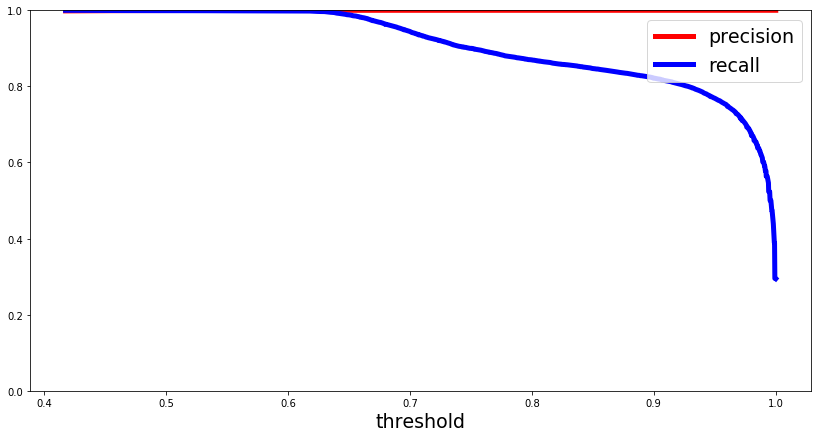

In [93]:
########PRECESSION RECALL CURVE######

from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_trains)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_trains, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

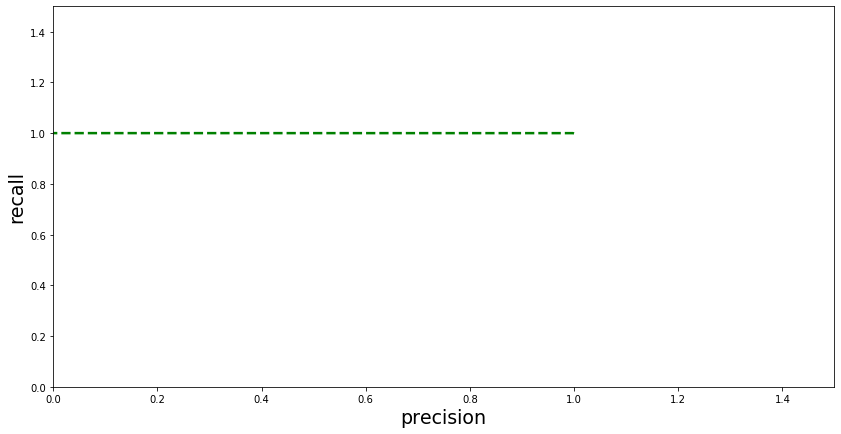

In [94]:
#######THRESHOLD ESTIMATING AS RECALL IS FALLING#####
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

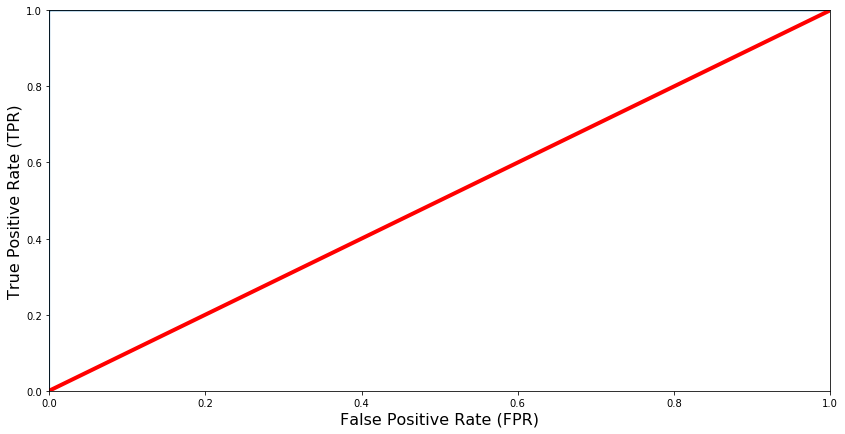

ROC-AUC-Score: 0.999984367767015


In [95]:
############ROC CURVE#############3

from sklearn.metrics import roc_curve

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_trains, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()


##########ROC SCORE##########3

from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_trains, y_scores)
print("ROC-AUC-Score:", r_a_score)